# One Dimensional Bose Hubbard Model with QuTiP: Introduction

Saumya Biswas (sbiswas4@umd.edu)

For more information about QuTiP see [http://qutip.org](http://qutip.org)

We introduce the basic functionality of QuTiPs Lattice1d class of the lattice module.

# About

The qutip.lattice module enables defining tight binding/lattice models for bosons and fermions on lattices and calculating their fundamental properties specially features arising from the translational symmetry of the lattice. The lattice classes defined are compatible with the rest of the functionalities of QuTiP and can make use of them quite conveniently.

## Multiparticle physics

Lattice1d_f_Hubbard class deals with multi-particle physics of spin-$1/2$ electrons with the Fermi Hubbard model.

![title](images/latt_1.png)

## The Bose-Hubbard model
Defining an instance of the Lattice1d class requires formatting the second Quantized Hamiltonian in a unitcell based structure with nearest neighbor coupling only. Howewver, the functionality is limited to single particle physics only in Lattice1d class methods.

\begin{eqnarray}
H = \sum_{j} (\epsilon - \mu) b_{j}^{\dagger} b_{j} + \sum_{\langle j,k \rangle} t_{j,k} b_{j}^{\dagger} b_{k} + U\sum_j \left( b_{j}^{\dagger} b_{j} b_{j}^{\dagger} b_{j} - b_{j}^{\dagger} b_{j} \right)  \label{eq:FermiHubbard} 
\end{eqnarray}

where $b_i$ is the bosonic annihilation operator, $t_{j,k}$ is the nearest neighbour hopping, U the interaction strength. 

The Lattice1d_f_Hubbard class defines a 1d Bose Hubbard model with nearest neighbor hopping t and interaction strength U.

## How to Define a One Dimensional Bose Hubbard Model

In [1]:
from qutip import *
from qutip_lattice import *
import matplotlib.pyplot as plt
import numpy as np

## Problems with a given symmetry

The definition of the lattice requires the number of sites, periodicity, values for t and U. The dynamics problem can be solved on a basis with a chosen symmetry.

## Translational and particle number symmetric basis

In [2]:
num_sites = 4
Nmax=3
boseHubbardLattice1d = Lattice1d_bose_Hubbard(num_sites=num_sites, boundary="periodic", t=1, U=1)
[Hamiltonian, bosonbasis] = boseHubbardLattice1d.Hamiltonian(Nmax=Nmax, filling=2, kval=0)

All the operators computed are in the chosen basis with number and translational symmetry labeled by number and k-value.

In [3]:
Hamiltonian

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[ 2.         -2.82842712  0.        ]
 [-2.82842712  0.         -2.82842712]
 [ 0.         -2.82842712  0.        ]]

In [4]:
bosonbasis

{0: array([[0., 0., 0., 2.],
        [0., 0., 1., 1.],
        [0., 1., 0., 1.]])}

normHubbard states are the corresponding normalized states.

## Particle Number only basis

In [5]:
[Hamiltonian, bosonbasis] = boseHubbardLattice1d.Hamiltonian(Nmax=Nmax, filling=2)

Setting any argument to None gives a basis does not make use of that symmetry.

In [6]:
Hamiltonian

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[ 2.         -1.41421356  0.          0.          0.          0.
  -1.41421356  0.          0.          0.        ]
 [-1.41421356  0.         -1.41421356 -1.          0.          0.
   0.         -1.          0.          0.        ]
 [ 0.         -1.41421356  2.          0.         -1.41421356  0.
   0.          0.          0.          0.        ]
 [ 0.         -1.          0.          0.         -1.          0.
  -1.          0.         -1.          0.        ]
 [ 0.          0.         -1.41421356 -1.          0.         -1.41421356
   0.         -1.          0.          0.        ]
 [ 0.          0.          0.          0.         -1.41421356  2.
   0.          0.         -1.41421356  0.        ]
 [-1.41421356  0.          0.         -1.          0.          0.
   0.         -1.          0.         -1.41421356]
 [ 0.         -1.          0.          0.         -1.          0.
  -1.        

In [7]:
bosonbasis

array([[0., 0., 0., 2.],
       [0., 0., 1., 1.],
       [0., 0., 2., 0.],
       [0., 1., 0., 1.],
       [0., 1., 1., 0.],
       [0., 2., 0., 0.],
       [1., 0., 0., 1.],
       [1., 0., 1., 0.],
       [1., 1., 0., 0.],
       [2., 0., 0., 0.]])

## Lattice momentum only basis

In [8]:
[Hamiltonian, bosonbasis] = boseHubbardLattice1d.Hamiltonian(Nmax=Nmax, filling=None, kval=0)

In [9]:
Hamiltonian

Quantum object: dims = [[70], [70]], shape = (70, 70), type = oper, isherm = True
Qobj data =
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. -2.  0. ...  0.  0.  0.]
 [ 0.  0.  2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 16.  0.  0.]
 [ 0.  0.  0. ...  0. 14.  0.]
 [ 0.  0.  0. ...  0.  0. 24.]]

In [10]:
bosonbasis

{0: array([[0., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 2.],
        [0., 0., 0., 3.],
        [0., 0., 1., 1.],
        [0., 0., 1., 2.],
        [0., 0., 1., 3.],
        [0., 0., 2., 1.],
        [0., 0., 2., 2.],
        [0., 0., 2., 3.],
        [0., 0., 3., 1.],
        [0., 0., 3., 2.],
        [0., 0., 3., 3.],
        [0., 1., 0., 1.],
        [0., 1., 0., 2.],
        [0., 1., 0., 3.],
        [0., 1., 1., 1.],
        [0., 1., 1., 2.],
        [0., 1., 1., 3.],
        [0., 1., 2., 1.],
        [0., 1., 2., 2.],
        [0., 1., 2., 3.],
        [0., 1., 3., 1.],
        [0., 1., 3., 2.],
        [0., 1., 3., 3.],
        [0., 2., 0., 2.],
        [0., 2., 0., 3.],
        [0., 2., 1., 1.],
        [0., 2., 1., 2.],
        [0., 2., 1., 3.],
        [0., 2., 2., 1.],
        [0., 2., 2., 2.],
        [0., 2., 2., 3.],
        [0., 2., 3., 1.],
        [0., 2., 3., 2.],
        [0., 2., 3., 3.],
        [0., 3., 0., 3.],
        [0., 3., 1., 1.],
        [

## Complete basis: no symmetry

In [11]:
[Hamiltonian, bosonbasis] = boseHubbardLattice1d.Hamiltonian(filling=None, kval=None)

In [12]:
Hamiltonian

Quantum object: dims = [[81], [81]], shape = (81, 81), type = oper, isherm = True
Qobj data =
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 6. 0. 0.]
 [0. 0. 0. ... 0. 6. 0.]
 [0. 0. 0. ... 0. 0. 8.]]

In [13]:
bosonbasis

array([[0., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 2.],
       [0., 0., 1., 0.],
       [0., 0., 1., 1.],
       [0., 0., 1., 2.],
       [0., 0., 2., 0.],
       [0., 0., 2., 1.],
       [0., 0., 2., 2.],
       [0., 1., 0., 0.],
       [0., 1., 0., 1.],
       [0., 1., 0., 2.],
       [0., 1., 1., 0.],
       [0., 1., 1., 1.],
       [0., 1., 1., 2.],
       [0., 1., 2., 0.],
       [0., 1., 2., 1.],
       [0., 1., 2., 2.],
       [0., 2., 0., 0.],
       [0., 2., 0., 1.],
       [0., 2., 0., 2.],
       [0., 2., 1., 0.],
       [0., 2., 1., 1.],
       [0., 2., 1., 2.],
       [0., 2., 2., 0.],
       [0., 2., 2., 1.],
       [0., 2., 2., 2.],
       [1., 0., 0., 0.],
       [1., 0., 0., 1.],
       [1., 0., 0., 2.],
       [1., 0., 1., 0.],
       [1., 0., 1., 1.],
       [1., 0., 1., 2.],
       [1., 0., 2., 0.],
       [1., 0., 2., 1.],
       [1., 0., 2., 2.],
       [1., 1., 0., 0.],
       [1., 1., 0., 1.],
       [1., 1., 0., 2.],
       [1., 1., 1., 0.],


## Block-diagonalization with Translational Symmetry

Since in a translationally symmetric system, the Hamiltonian is block-diagonalized in k-basis, the unitary transformations for the block diagonalization can be obtained with certain functions.

### Hamiltonian in a basis without translational symmetry

In [14]:
[Hamiltonian, bosonbasis] = boseHubbardLattice1d.Hamiltonian(filling=2, kval=None)
kVector = np.arange(start=0, stop=2*np.pi, step=2*np.pi/num_sites)
kval = 0

Uss_k0 = boseHubbardLattice1d.nums_DiagTrans_k(2, 0, Nmax=Nmax)
Usss = boseHubbardLattice1d.nums_DiagTrans(2, Nmax=Nmax)

### Hamiltonian in the translational symmetric basis
The unitary transformations calculated effectuate a transformation from the basis without translational symmetry to Wannier functions with translational symmetry.

In [15]:
Hamiltonian_k = Usss * Hamiltonian * Usss.dag()

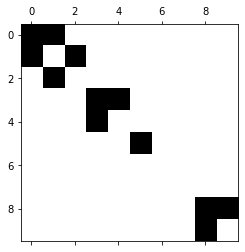

In [16]:
nHubbardStates = np.shape(Hamiltonian_k)[0]

Hamiltonian_k_np = Hamiltonian_k.full()
for i in range(nHubbardStates):
    for j in range(nHubbardStates):
        if np.abs(Hamiltonian_k_np[i,j]) < 1e-8:
            Hamiltonian_k_np[i, j] = 0
plt.spy(np.abs(Hamiltonian_k_np))

The k=0 block can be obtained with the Uss_k0 matrix instead of reading from the matrix Hamiltonian_k_np.

In [17]:
Hamiltonian_k_0 = Uss_k0 * Hamiltonian * Uss_k0.dag()
Hamiltonian_k_0

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[ 2.         -2.82842712  0.        ]
 [-2.82842712  0.         -2.82842712]
 [ 0.         -2.82842712  0.        ]]

### Hamiltonian for a k-block:
The block diagonalized k-block Hamiltonians can be found directly with the Hamiltonian() function with a specified k as well.


In [18]:
[Hamiltonian_k0, bosonbasis] = boseHubbardLattice1d.Hamiltonian( filling=2, kval=0)
Hamiltonian_k0

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[ 2.         -2.82842712  0.        ]
 [-2.82842712  0.         -2.82842712]
 [ 0.         -2.82842712  0.        ]]

## Confirming the Hamiltonians formed in k-symmetric basis are indeed the same

In [19]:
np.testing.assert_allclose(Hamiltonian_k_0, Hamiltonian_k0.full(), atol=1e-8)

# Example: Symmetry protected Dynamics¶

We now calculate a dynamics with loss operators and expectation values of given operators.

In [20]:
h_dim = np.shape(Hamiltonian_k0)[0]
psi0 = np.ones(h_dim, dtype=complex)
psi0 = Qobj(np.sqrt(psi0), dims= [[h_dim], [1]])

In [21]:
psi0

Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[1.]
 [1.]
 [1.]]

In [22]:
psi = np.zeros(h_dim, dtype=complex)
col_op=[]
for i in range(h_dim):
    psi[i] = 1
    rsi = Qobj(psi)
    col_i = rsi * rsi.dag()
    col_op.append(col_i)
    psi[i] = 0

No specific physics conceived of in this exercise.

In [23]:
kC = Qobj(np.diag(np.ones(h_dim, dtype=complex)))

In [24]:
tlistCN = np.linspace(0,30,601)
options = Options(atol=1e-12)
options.store_states = True
evol_psi = mesolve(Hamiltonian_k0, psi0, tlistCN, col_op, [kC], options=options)

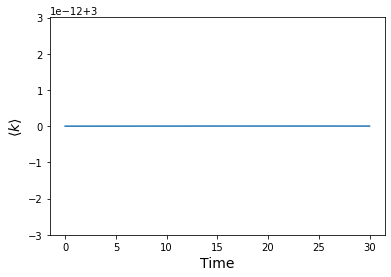

In [25]:
plt.plot(tlistCN, evol_psi.expect[0])
plt.xlabel('Time', fontsize=14)
plt.ylabel(r'$\langle k \rangle$', fontsize=14)
#plt.ylim([-1e-8, 1e-8])
plt.show()
plt.close()

### References
[1] J. R. Johansson, P. D. Nation, and F. Nori, Comp. Phys. Comm. 183, 1760 (2012). http://qutip.org 

[2] Han, JungYun, Clemens Gneiting, and Daniel Leykam. "Helical transport in coupled resonator waveguides." Physical Review B 99.22 (2019): 224201.
https://journals.aps.org/prb/abstract/10.1103/PhysRevB.99.224201#

In [66]:
qutip.about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Jake Lishman and Simon Cross.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.7.0.dev0+2941f20
Numpy Version:      1.19.1
Scipy Version:      1.5.2
Cython Version:     0.29.21
Matplotlib Version: 3.3.1
Python Version:     3.6.13
Number of CPUs:     4
BLAS Info:          INTEL MKL
OPENMP Installed:   True
INTEL MKL Ext:      True
Platform Info:      Linux (x86_64)
Installation path:  /home/ssaumya7/Desktop/qutip_serenity/qutip/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `q

In [67]:
qutip.cite()

@article{qutip2,
doi = {10.1016/j.cpc.2012.11.019},
url = {https://doi.org/10.1016/j.cpc.2012.11.019},
year  = {2013},
month = {apr},
publisher = {Elsevier {BV}},
volume = {184},
number = {4},
pages = {1234--1240},
author = {J.R. Johansson and P.D. Nation and F. Nori},
title = {{QuTiP} 2: A {P}ython framework for the dynamics of open quantum systems},
journal = {Computer Physics Communications}
}
@article{qutip1,
doi = {10.1016/j.cpc.2012.02.021},
url = {https://doi.org/10.1016/j.cpc.2012.02.021},
year  = {2012},
month = {aug},
publisher = {Elsevier {BV}},
volume = {183},
number = {8},
pages = {1760--1772},
author = {J.R. Johansson and P.D. Nation and F. Nori},
title = {{QuTiP}: An open-source {P}ython framework for the dynamics of open quantum systems},
journal = {Computer Physics Communications}
}
